In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\whgur\Desktop\workspace\ADP\lotto.csv')
df

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [6]:
df.iloc[:,1:].values

array([[ 8, 22, 35, 38, 39, 41],
       [ 9, 13, 32, 38, 39, 43],
       [ 6, 10, 16, 28, 34, 38],
       ...,
       [11, 16, 19, 21, 27, 31],
       [ 9, 13, 21, 25, 32, 42],
       [10, 23, 29, 33, 37, 40]], dtype=int64)

In [7]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
tr_array = encoder.fit_transform(df.iloc[:,1:].values)

In [11]:
df_item = pd.DataFrame(tr_array, columns=encoder.columns_)
df_item

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [15]:
df_item.sum().sort_values(ascending=False)[:10]

34    134
40    126
27    126
43    125
20    124
17    123
12    123
1     122
14    122
10    122
dtype: int64

In [24]:
list(map(str,list(df_item.sum().sort_values(ascending=False)[:10].index)))

['34', '40', '27', '43', '20', '17', '12', '1', '14', '10']

<BarContainer object of 10 artists>

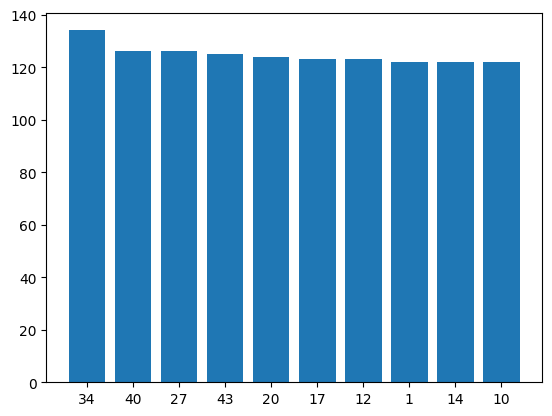

In [25]:
import matplotlib.pyplot as plt

plt.bar(list(map(str,list(df_item.sum().sort_values(ascending=False)[:10].index))), df_item.sum().sort_values(ascending=False)[:10].values)

In [26]:
from pydoc import apropos
from mlxtend.frequent_patterns import apriori, association_rules

item_sets = apriori(df_item, min_support=0.002)

In [43]:
item_sets[item_sets['itemsets'].map(lambda x: True if len(x) > 2 else False)]

,support,itemsets
1035,0.003492,"(0, 1, 2)"
1036,0.002328,"(0, 1, 3)"
1037,0.003492,"(0, 1, 5)"
1038,0.003492,"(0, 1, 7)"
1039,0.004657,"(0, 1, 8)"
...,...,...
6358,0.002328,"(39, 42, 12, 13, 25)"
6359,0.002328,"(13, 14, 17, 20, 25)"
6360,0.002328,"(39, 13, 26, 29, 30)"
6361,0.002328,"(33, 43, 14, 18, 20)"


In [41]:
data = association_rules(item_sets, metric='confidence', min_threshold=0.8,)
data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(0, 2, 42)",(11),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
1,"(0, 2, 14)",(24),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
2,"(24, 2, 14)",(0),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(24, 2, 19)",(0),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(0, 2, 28)",(36),0.002328,0.136205,0.002328,1.0,7.341880,0.002011,inf
...,...,...,...,...,...,...,...,...,...
699,"(25, 42, 30, 15)",(35),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
700,"(42, 35, 15)","(25, 30)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
701,"(25, 35, 15)","(42, 30)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
702,"(25, 42, 15)","(35, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [33]:
data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(0, 2, 42)",(11),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
1,"(0, 2, 14)",(24),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
2,"(24, 2, 14)",(0),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(24, 2, 19)",(0),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(0, 2, 28)",(36),0.002328,0.136205,0.002328,1.0,7.341880,0.002011,inf
...,...,...,...,...,...,...,...,...,...
699,"(25, 42, 30, 15)",(35),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
700,"(42, 35, 15)","(25, 30)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
701,"(25, 35, 15)","(42, 30)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
702,"(25, 42, 15)","(35, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [40]:
data[data['antecedents'].map(lambda x: True if len(x) > 2 else False)].sort_values('lift', ascending=False)[:30]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
703,"(25, 30, 15)","(42, 35)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
643,"(33, 21, 23)","(6, 30)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
642,"(33, 6, 30)","(21, 23)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
682,"(25, 20, 13)","(17, 14)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
652,"(33, 35, 9)","(43, 21)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
646,"(21, 30, 23)","(33, 6)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
666,"(19, 14, 23)","(11, 29)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
702,"(25, 42, 15)","(35, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
700,"(42, 35, 15)","(25, 30)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
653,"(33, 21, 9)","(43, 35)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf
